<H1>
    CardioVascular Analysis
</H1>

In [1]:
#import all necessary packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, auc


In [2]:
#load the file
df=pd.read_excel("datahealth.xlsx")

In [3]:
#print the data 
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
#Seeing how many rows and columns
df.shape

(303, 14)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [6]:
#Checking Null Values
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [7]:
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [8]:
#Finding duplicates
duplicates=df.duplicated()
print(duplicates.sum())

1


In [9]:
#drop duplicates
df=df.drop_duplicates()

In [10]:
#Statistically summary
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


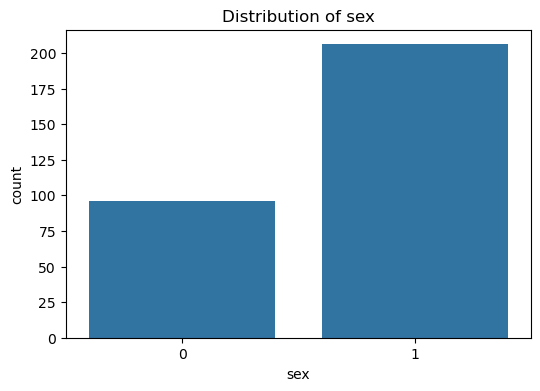

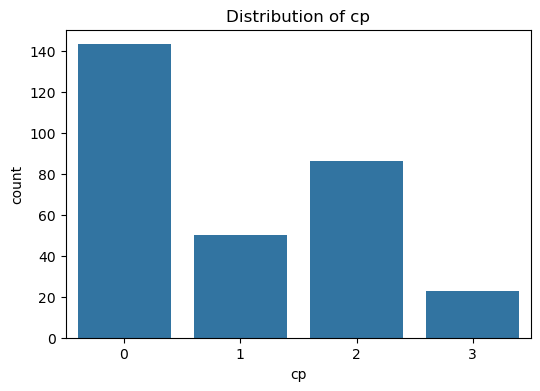

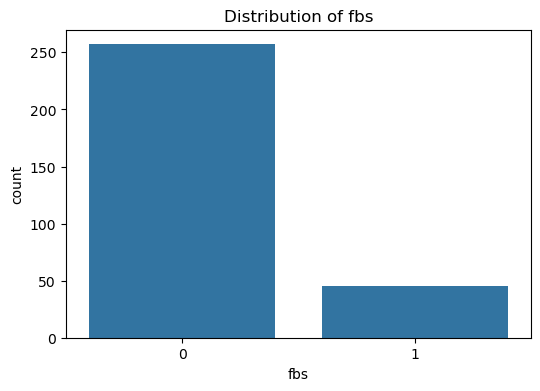

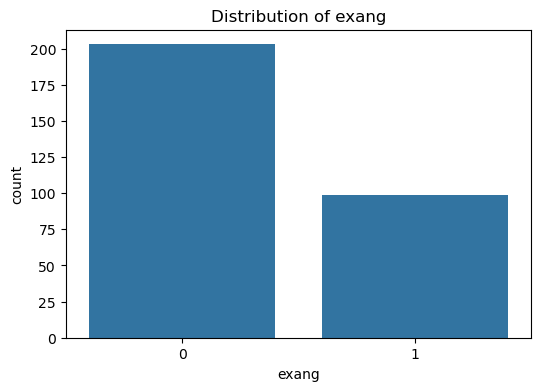

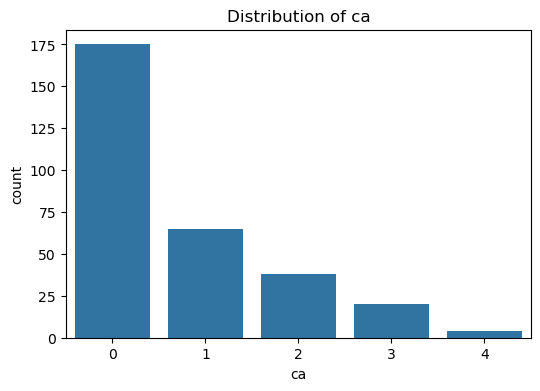

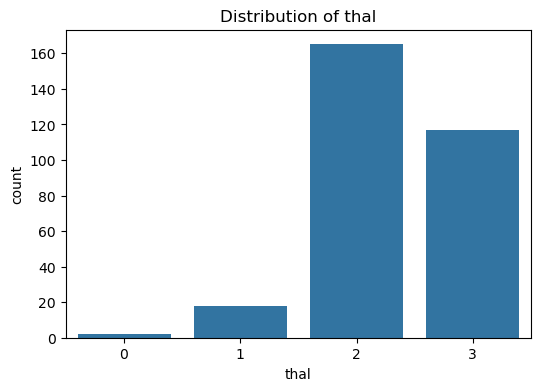

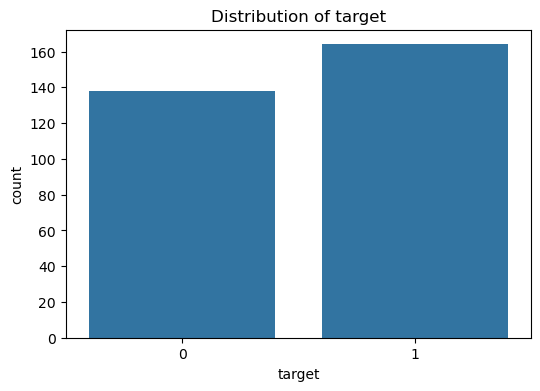

In [11]:
#Identify categorical variables
categorical_cols = ['sex','cp','fbs','exang','ca','thal','target']

# Create count plots for categorical variables
for col in categorical_cols:
    plt.figure(figsize=(6, 4))
    sns.countplot(data=df, x=col)
    plt.title(f'Distribution of {col}')
    plt.show()

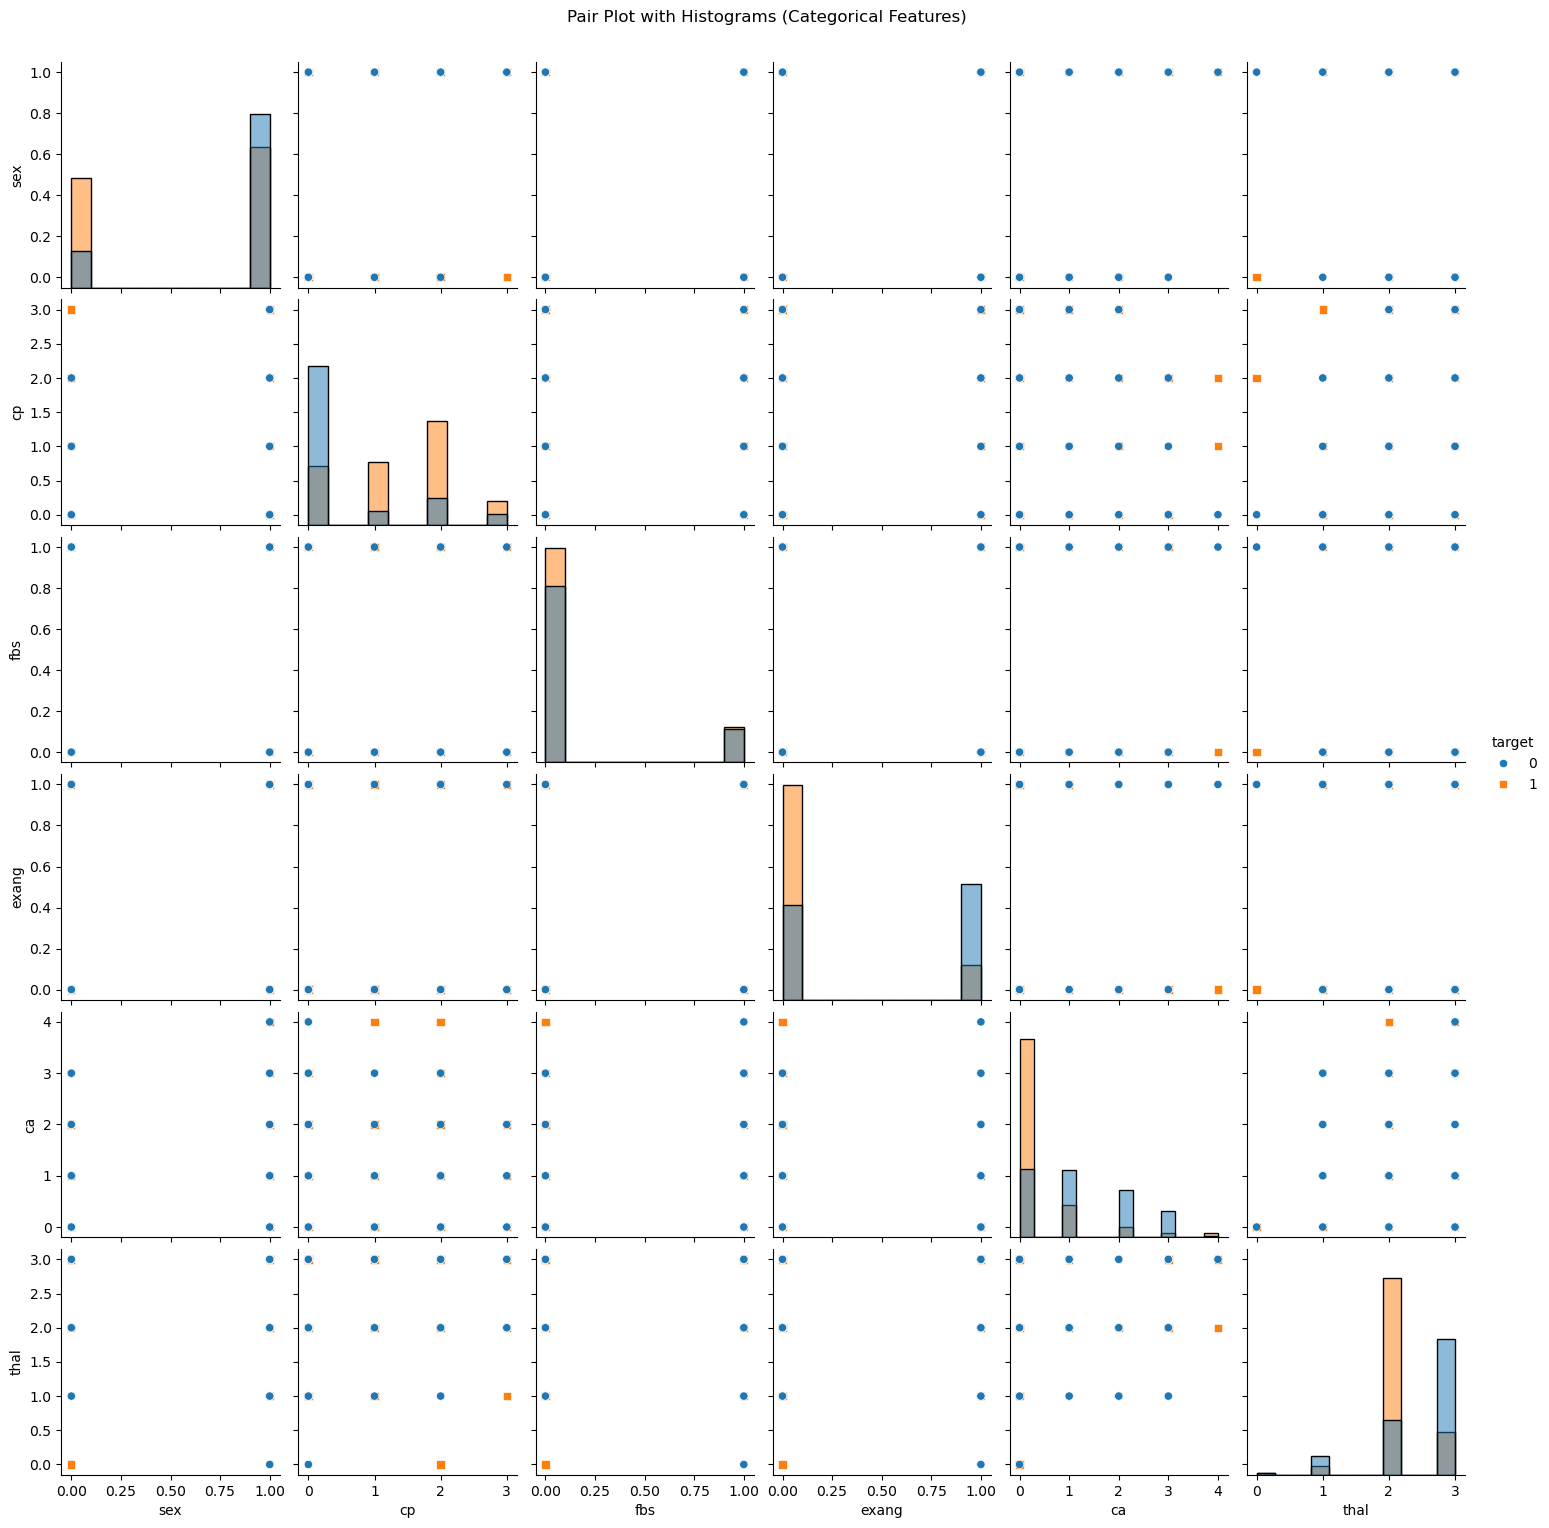

In [12]:
sns.pairplot(df[categorical_cols], hue='target', diag_kind='hist', markers=["o", "s"])

# Add title to the plot
plt.suptitle("Pair Plot with Histograms (Categorical Features)", y=1.02)

# Show the plot
plt.show()

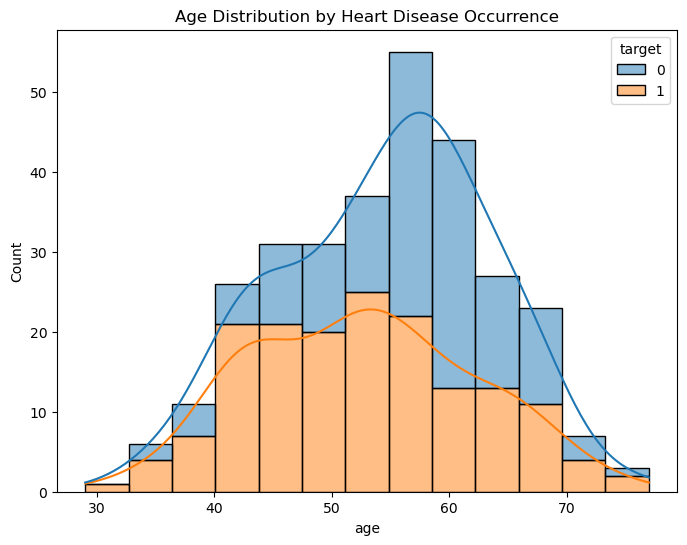

In [13]:
# Age distribution based on target (heart disease occurrence)
plt.figure(figsize=(8, 6))
sns.histplot(df, x='age', hue='target', multiple='stack', kde=True)
plt.title('Age Distribution by Heart Disease Occurrence')
plt.show()

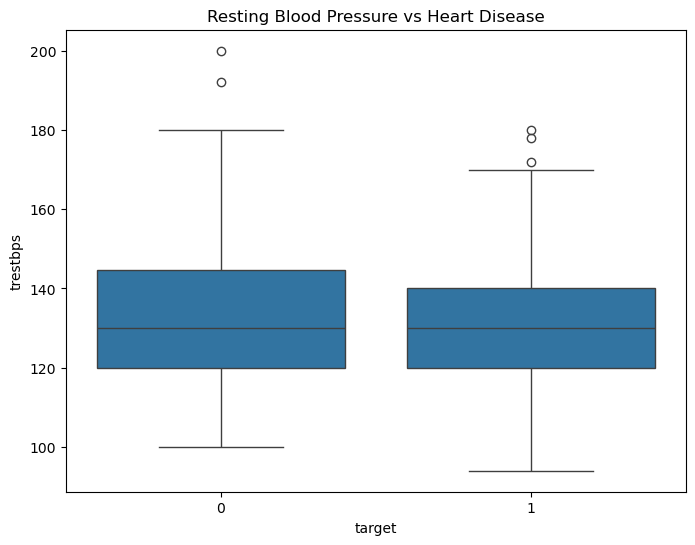

In [14]:
# Boxplot to detect anomalies in resting blood pressure
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='target', y='trestbps')
plt.title('Resting Blood Pressure vs Heart Disease')
plt.show()

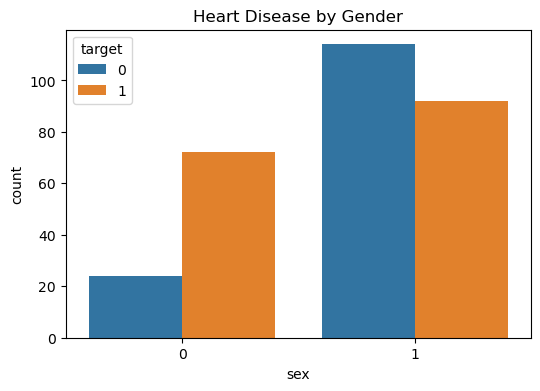

In [15]:
# Gender distribution based on target (heart disease occurrence)
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='sex', hue='target')
plt.title('Heart Disease by Gender')
plt.show()

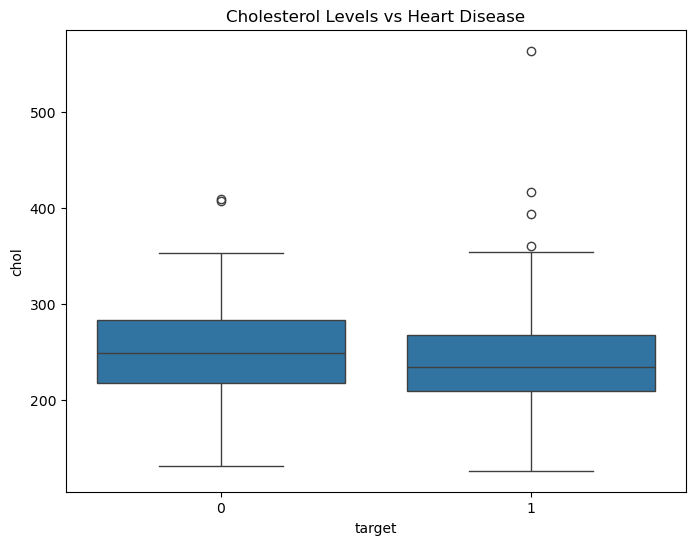

In [16]:
# Boxplot to analyze cholesterol levels vs heart disease occurrence
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='target', y='chol')
plt.title('Cholesterol Levels vs Heart Disease')
plt.show()

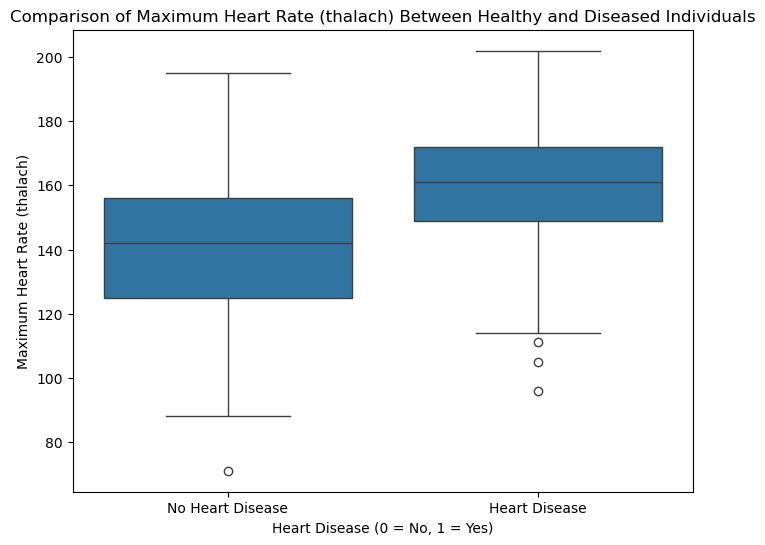

In [17]:
# Create boxplot to compare 'thalach' between target categories (0: No Heart Disease, 1: Heart Disease)
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='target', y='thalach')
plt.title('Comparison of Maximum Heart Rate (thalach) Between Healthy and Diseased Individuals')
plt.xlabel('Heart Disease (0 = No, 1 = Yes)')
plt.ylabel('Maximum Heart Rate (thalach)')
plt.xticks([0, 1], ['No Heart Disease', 'Heart Disease'])
plt.show()

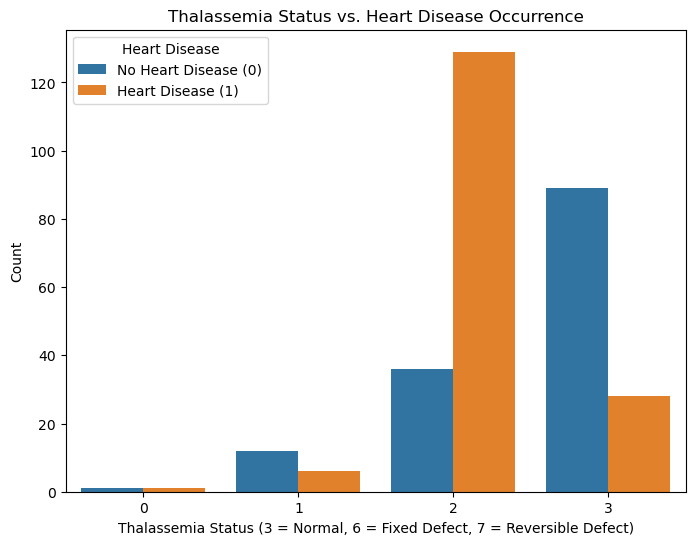

In [18]:
# Count plot to show distribution of thalassemia status across heart disease occurrence
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='thal', hue='target')
plt.title('Thalassemia Status vs. Heart Disease Occurrence')
plt.xlabel('Thalassemia Status (3 = Normal, 6 = Fixed Defect, 7 = Reversible Defect)')
plt.ylabel('Count')
plt.legend(title='Heart Disease', labels=['No Heart Disease (0)', 'Heart Disease (1)'])
plt.show()

<Figure size 10000x10000 with 0 Axes>

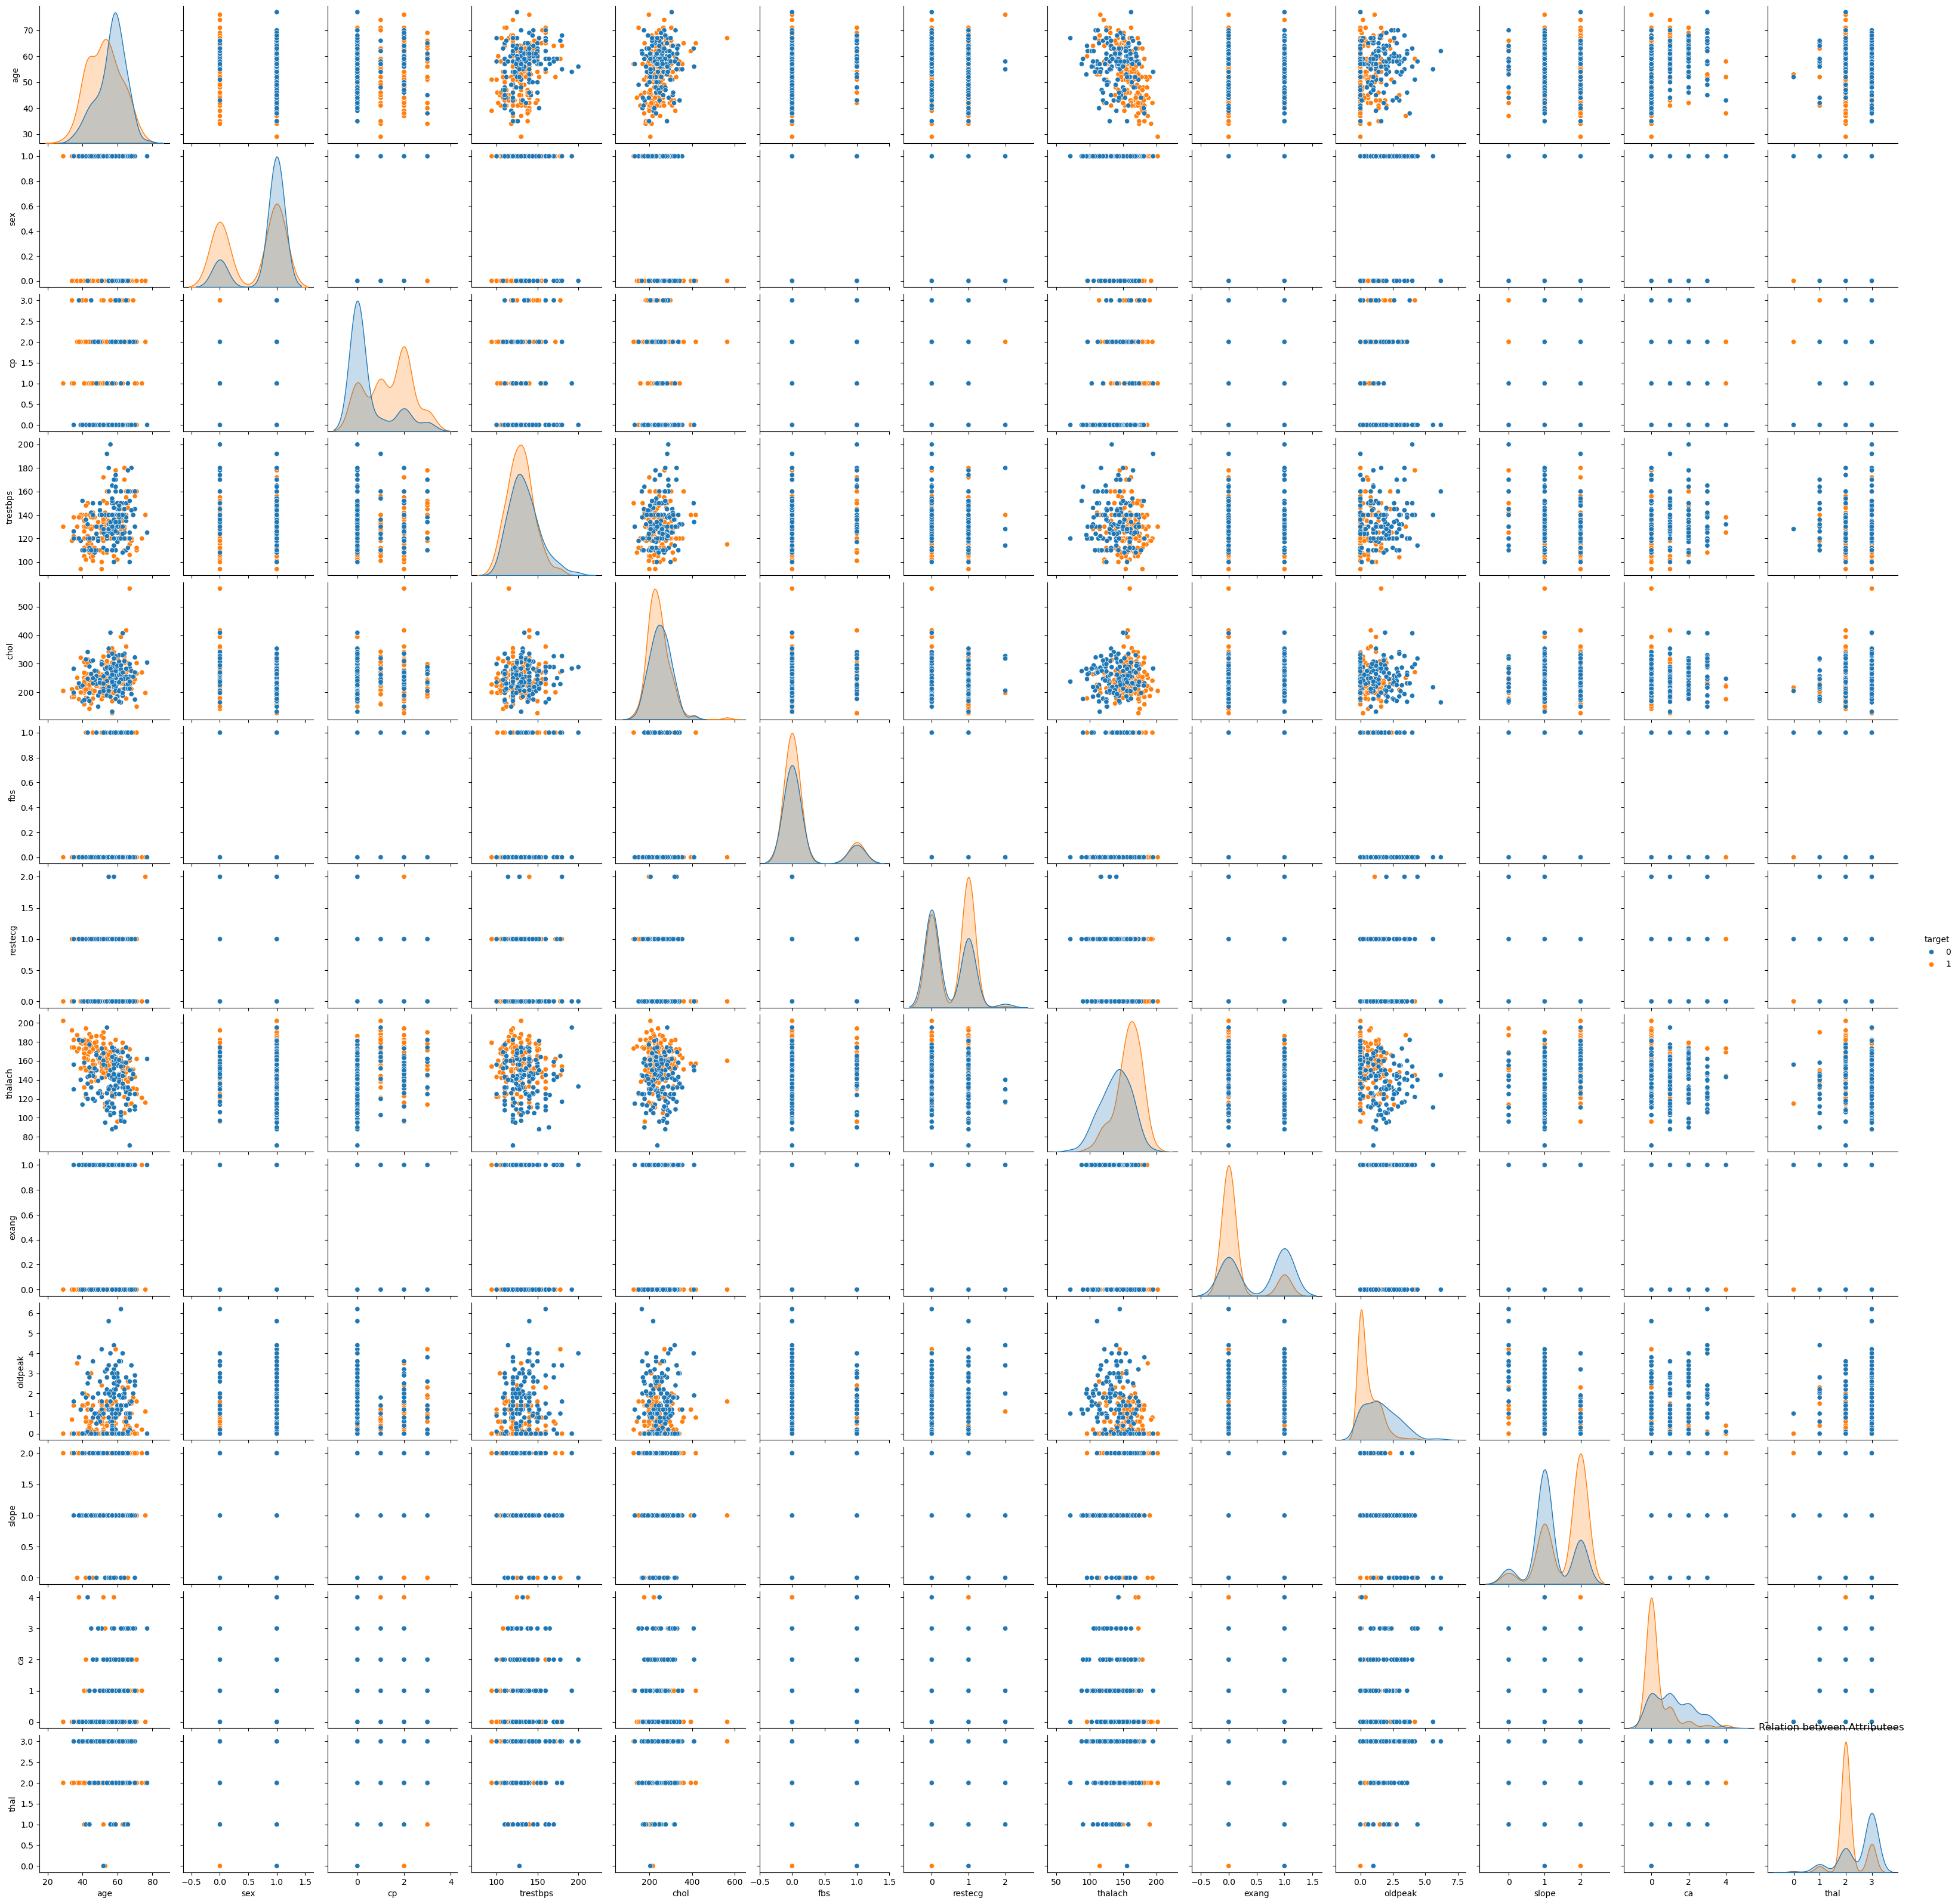

In [19]:
#Relation between attributes 
plt.figure(figsize=(100,100))
sns.pairplot(data=df, hue='target')
plt.title('Relation between Attributees ')
plt.show()

In [20]:
# correlation matrix
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.094962,-0.063107,0.283121,0.207216,0.119492,-0.111590,-0.395235,0.093216,0.206040,-0.164124,0.302261,0.065317,-0.221476
sex,-0.094962,1.000000,-0.051740,-0.057647,-0.195571,0.046022,-0.060351,-0.046439,0.143460,0.098322,-0.032990,0.113060,0.211452,-0.283609
cp,-0.063107,-0.051740,1.000000,0.046486,-0.072682,0.096018,0.041561,0.293367,-0.392937,-0.146692,0.116854,-0.195356,-0.160370,0.432080
trestbps,0.283121,-0.057647,0.046486,1.000000,0.125256,0.178125,-0.115367,-0.048023,0.068526,0.194600,-0.122873,0.099248,0.062870,-0.146269
chol,0.207216,-0.195571,-0.072682,0.125256,1.000000,0.011428,-0.147602,-0.005308,0.064099,0.050086,0.000417,0.086878,0.096810,-0.081437
fbs,0.119492,0.046022,0.096018,0.178125,0.011428,1.000000,-0.083081,-0.007169,0.024729,0.004514,-0.058654,0.144935,-0.032752,-0.026826
restecg,-0.111590,-0.060351,0.041561,-0.115367,-0.147602,-0.083081,1.000000,0.041210,-0.068807,-0.056251,0.090402,-0.083112,-0.010473,0.134874
thalach,-0.395235,-0.046439,0.293367,-0.048023,-0.005308,-0.007169,0.041210,1.000000,-0.377411,-0.342201,0.384754,-0.228311,-0.094910,0.419955
exang,0.093216,0.143460,-0.392937,0.068526,0.064099,0.024729,-0.068807,-0.377411,1.000000,0.286766,-0.256106,0.125377,0.205826,-0.435601
oldpeak,0.206040,0.098322,-0.146692,0.194600,0.050086,0.004514,-0.056251,-0.342201,0.286766,1.000000,-0.576314,0.236560,0.209090,-0.429146


In [21]:
df1=df.copy()

In [22]:
# Prepare data (encoding categorical variables, splitting features and target)
X = df1.drop('target', axis=1)
y = df1['target']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize logistic regression model
model = LogisticRegression(max_iter=1000)

# Train the model
model.fit(X_train, y_train)

# Predict on test data
y_pred = model.predict(X_test)


# Evaluate the model using confusion matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[24  5]
 [ 6 26]]
              precision    recall  f1-score   support

           0       0.80      0.83      0.81        29
           1       0.84      0.81      0.83        32

    accuracy                           0.82        61
   macro avg       0.82      0.82      0.82        61
weighted avg       0.82      0.82      0.82        61



In [23]:


# Set up the parameter grid
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],  # Regularization strength
    'solver': ['lbfgs', 'liblinear', 'saga'],  # Solvers for optimization
    'max_iter': [100, 200, 500]  # Max iterations for convergence
}

# Initialize Logistic Regression model
logreg = LogisticRegression()

# Set up GridSearchCV
grid_search = GridSearchCV(logreg, param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Print the best parameters and score
print("Best Parameters: ", grid_search.best_params_)
print("Best Cross-validation Score: ", grid_search.best_score_)

# Get the best model
best_model = grid_search.best_estimator_

# Evaluate on the test set
y_pred = best_model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


Fitting 5 folds for each of 45 candidates, totalling 225 fits
Best Parameters:  {'C': 10, 'max_iter': 500, 'solver': 'lbfgs'}
Best Cross-validation Score:  0.855017006802721
[[24  5]
 [ 5 27]]
              precision    recall  f1-score   support

           0       0.83      0.83      0.83        29
           1       0.84      0.84      0.84        32

    accuracy                           0.84        61
   macro avg       0.84      0.84      0.84        61
weighted avg       0.84      0.84      0.84        61



C:\Users\Bunny\Downloads\ana\anac\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [24]:

# Initialize Random Forest Classifier

rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf.fit(X_train, y_train)

# Predict and evaluate on the test set
y_pred_rf = rf.predict(X_test)

# Evaluate the results
print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))


[[26  3]
 [ 5 27]]
              precision    recall  f1-score   support

           0       0.84      0.90      0.87        29
           1       0.90      0.84      0.87        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61



In [25]:

# Initialize Gradient Boosting
gb = GradientBoostingClassifier(n_estimators=100, random_state=42)

# Train the model
gb.fit(X_train, y_train)

# Predict and evaluate on the test set
y_pred_gb = gb.predict(X_test)

# Evaluate the results
print(confusion_matrix(y_test, y_pred_gb))
print(classification_report(y_test, y_pred_gb))


[[26  3]
 [ 6 26]]
              precision    recall  f1-score   support

           0       0.81      0.90      0.85        29
           1       0.90      0.81      0.85        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.86      0.85      0.85        61



In [26]:


# Initialize Support Vector Classifier
svm = SVC(kernel='linear', random_state=42)

# Train the model
svm.fit(X_train, y_train)

# Predict and evaluate on the test set
y_pred_svm = svm.predict(X_test)

# Evaluate the results
print(confusion_matrix(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))


[[25  4]
 [ 5 27]]
              precision    recall  f1-score   support

           0       0.83      0.86      0.85        29
           1       0.87      0.84      0.86        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



In [27]:
#Adding new features to improve eficiency
df1['CP_Thal']=df1['cp']*df1['thal']
df1['exang_thal']=df1['exang']*df1['thal']
df1['thalach_restecg']=df1['thalach']*df1['restecg']




# Interaction feature between oldpeak and slope
df1['oldpeak_slope_interaction'] = df1['oldpeak'] * df1['slope']

# Create categories for blood pressure
df1['bp_category'] = pd.cut(df1['trestbps'], bins=[0, 120, 130, 140, 160, 180, 200], 
                                 labels=['Normal', 'Elevated', 'Stage 1 Hypertension', 'Stage 2 Hypertension', 'Hypertensive Crisis', 'Severe Hypertension'])

bins = [0, 35, 55, 100]  # Define the age groups
labels = ['Young', 'Middle-Aged', 'Old']  # Labels for the groups
df1['age_group'] = pd.cut(df1['age'], bins=bins, labels=labels, right=False)


# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Encode the 'bp_category' column
df1['age_grup_category']=label_encoder.fit_transform(df1['age_group'])

df1=df1.drop(['age_group','bp_category'],axis=1)








In [28]:
df_added=df1.copy()

In [29]:
# Prepare data (encoding categorical variables, splitting features and target)
X = df_added.drop('target', axis=1)
y = df_added['target']
# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize logistic regression model
model = LogisticRegression(max_iter=1000)

# Train the model
model.fit(X_train, y_train)

# Predict on test data
y_pred = model.predict(X_test)


# Evaluate the model using confusion matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[25  4]
 [ 3 29]]
              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



C:\Users\Bunny\Downloads\ana\anac\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [30]:


# Set up the parameter grid
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],  # Regularization strength
    'solver': ['lbfgs', 'liblinear', 'saga'],  # Solvers for optimization
    'max_iter': [100, 200, 500]  # Max iterations for convergence
}

# Initialize Logistic Regression model
logreg = LogisticRegression()

# Set up GridSearchCV
grid_search = GridSearchCV(logreg, param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Print the best parameters and score
print("Best Parameters: ", grid_search.best_params_)
print("Best Cross-validation Score: ", grid_search.best_score_)

# Get the best model
best_model = grid_search.best_estimator_

# Evaluate on the test set
y_pred = best_model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


Fitting 5 folds for each of 45 candidates, totalling 225 fits
Best Parameters:  {'C': 100, 'max_iter': 200, 'solver': 'lbfgs'}
Best Cross-validation Score:  0.8590986394557824
[[25  4]
 [ 6 26]]
              precision    recall  f1-score   support

           0       0.81      0.86      0.83        29
           1       0.87      0.81      0.84        32

    accuracy                           0.84        61
   macro avg       0.84      0.84      0.84        61
weighted avg       0.84      0.84      0.84        61



C:\Users\Bunny\Downloads\ana\anac\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [31]:

# Initialize Random Forest Classifier

rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf.fit(X_train, y_train)

# Predict and evaluate on the test set
y_pred_rf = rf.predict(X_test)

# Evaluate the results
print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))


[[26  3]
 [ 4 28]]
              precision    recall  f1-score   support

           0       0.87      0.90      0.88        29
           1       0.90      0.88      0.89        32

    accuracy                           0.89        61
   macro avg       0.88      0.89      0.89        61
weighted avg       0.89      0.89      0.89        61



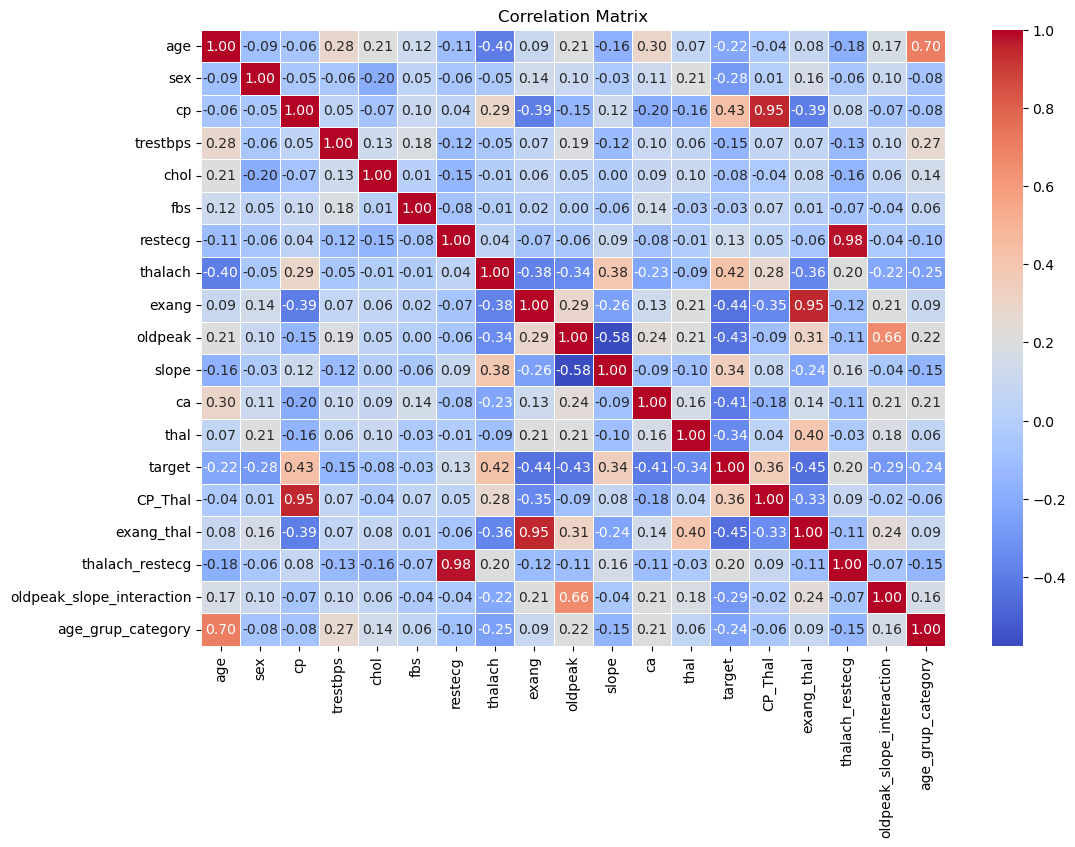

In [32]:

# Calculate the correlation matrix
corr_matrix = df_added.corr()

# Plot the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()


In [33]:

# Create bins for 'thalach' based on the observed thresholds
bins = [0,80,100,120,140,160,180, 200]  # Define bin edges (you can adjust these based on the data)
bin_labels = ['Risky','Very Low', 'Low', 'Normal', 'Moderate','High', 'Very High']  # Labels for the bins

# Create a new column with binned categories
df_added['thalach_category'] = pd.cut(df_added['thalach'], bins=bins, labels=bin_labels, right=False)



In [34]:
df1=df_added

In [35]:
# Create categories for blood pressure
df1['bp_category'] = pd.cut(df1['trestbps'], bins=[0, 120, 130, 140, 160, 180, 200], 
                                 labels=['Normal', 'Elevated', 'Stage 1 Hypertension', 'Stage 2 Hypertension', 'Hypertensive Crisis', 'Severe Hypertension'])

bins = [0, 35, 55, 100]  # Define the age groups
labels = ['Young', 'Middle-Aged', 'Old']  # Labels for the groups
df1['age_group'] = pd.cut(df1['age'], bins=bins, labels=labels, right=False)
df1.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,...,thal,target,CP_Thal,exang_thal,thalach_restecg,oldpeak_slope_interaction,age_grup_category,thalach_category,bp_category,age_group
0,63,1,3,145,233,1,0,150,0,2.3,...,1,1,3,0,0,0.0,1,Moderate,Stage 2 Hypertension,Old
1,37,1,2,130,250,0,1,187,0,3.5,...,2,1,4,0,187,0.0,0,Very High,Elevated,Middle-Aged
2,41,0,1,130,204,0,0,172,0,1.4,...,2,1,2,0,0,2.8,0,High,Elevated,Middle-Aged
3,56,1,1,120,236,0,1,178,0,0.8,...,2,1,2,0,178,1.6,1,High,Normal,Old
4,57,0,0,120,354,0,1,163,1,0.6,...,2,1,0,2,163,1.2,1,High,Normal,Old


In [37]:
df1.to_csv("Cardio.csv",index=False)